# Predict the Number of Bikes People Would Rent in an Hour Given Different Conditions

# Introduction

This project aims to use three machine learning models to predict the total number of bikes people rented in an hour given varialbes like season, weekend, weather conditions, and so on. This project uses 17389 bike rental instances with 16 features from 2011 and 2012 in Capital bikeshare system. The three machine learning models that are used in this projects are: linear regression, decision tree, and random forest.

# Problem and Target Column

- Problem : the total number of bikes people rented in an hour given varialbes like season, weekend, weather conditions
- Target column: 
    - cnt - The total number of bike rentals (casual + registered)
    - casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
    - registered - The number of registered riders (people who had already signed up)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
bike_rentals = pd.read_csv('hour.csv')

In [4]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [29]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [30]:
bike_rentals['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

([<matplotlib.axis.XTick at 0x19a4bb07548>,
 <a list of 10 Text xticklabel objects>)

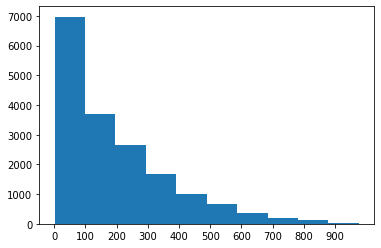

In [31]:
plt.hist(bike_rentals['cnt'])
plt.xticks(np.arange(0, 1000, step =100))

# Stage 1. Feature Engineering

## 1a. Find features that are well related to the target column (cnt)

In [32]:
c = bike_rentals.corr()

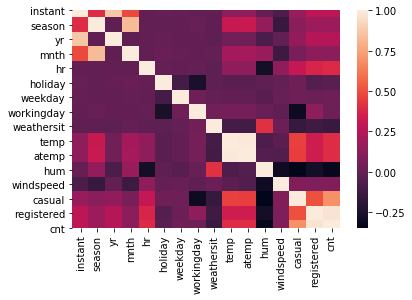

In [33]:
sns.heatmap(c)

In [34]:
c['cnt'].sort_values()

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

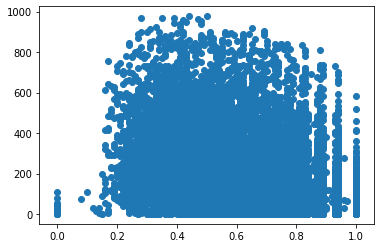

In [35]:
plt.scatter(bike_rentals['hum'], bike_rentals['cnt'])

## 1b. Binning the hour column to four categories

In [36]:
def assign_label (hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

In [37]:
bike_rentals['time_label'].value_counts()

2    4375
3    4368
1    4360
4    4276
Name: time_label, dtype: int64

# Stage 2. Error Metrics Selection

We Choose MSE because this is a regression model, and the target column contains continuous numeric data 

# Stage 3. Train and Test Split

Train 80%, Test 20%

In [38]:
train = bike_rentals.sample(frac=0.8)

In [39]:
test = bike_rentals[~bike_rentals.index.isin(train.index)]

# Stage 4. Feature Selection

In [85]:
train.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'time_label'],
      dtype='object')

In [41]:
train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
10199,10200,2012-03-06,1,1,3,1,0,2,1,1,0.20,0.1970,0.44,0.2537,0,6,6,4
586,587,2011-01-26,1,0,1,17,0,3,1,3,0.20,0.1818,0.93,0.3582,0,26,26,2
8682,8683,2012-01-02,1,1,1,14,1,1,0,1,0.30,0.2727,0.36,0.4179,10,141,151,2
11759,11760,2012-05-10,2,1,5,4,0,4,1,1,0.46,0.4545,0.77,0.1940,0,2,2,4
6479,6480,2011-10-02,4,0,10,13,0,0,0,3,0.40,0.4091,0.62,0.2239,84,224,308,2


columns to delete: instant, dteday(because we already have weekday, working day), casual, registered

In [86]:
predictors = list(train.columns)
predictors

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'time_label']

In [87]:
predictors.remove('instant')
predictors.remove('dteday')
predictors.remove('casual')
predictors.remove('registered')
predictors.remove('cnt')

columns to delete: 
- 1. hour - as 'time_label' is created from hour to, so no need to include both hour and time_label at the same time
- 2. season - as 'mnth' is a better representation of season
- 3. holiday and weekday - Because you have already have a column called workingday, which is the combination of holiday and weekday.
- 4. temp - as atemp is the same as temp

In [88]:
predictors.remove('temp')
predictors.remove('time_label')

In [89]:
predictors

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'atemp',
 'hum',
 'windspeed']

# Stage 4. Model Selection

## 4a. Linear Regression Model

In [90]:
lr = LinearRegression()

In [92]:
lr.fit(train[predictors], train['cnt'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
prediction = lr.predict(test[predictors])

In [94]:
mse = mean_squared_error(test['cnt'], prediction)
mse

19385.149142550483

## 4b. Decision Tree

In [95]:
reg = DecisionTreeRegressor()
reg.fit(train[predictors], train['cnt'])
prediction2 = reg.predict(test[predictors])

In [96]:
mse = mean_squared_error(test['cnt'], prediction2)
mse

3388.150172612198

In [97]:
np.arange(1, 6)

array([1, 2, 3, 4, 5])

### Hyperparameter Optimization for Decision Tree

#### min_samples_leaf

In [98]:
mse = []
for i in np.arange(1, 10):
    reg = DecisionTreeRegressor(min_samples_leaf = i)
    reg.fit(train[predictors], train['cnt'])
    prediction2 = reg.predict(test[predictors])
    mse1 = mean_squared_error(test['cnt'], prediction2)
    mse.append(mse1)

In [99]:
mse

[3265.5585443037976,
 2982.2258183096787,
 2844.8080569939902,
 2887.8860378891436,
 2980.522593969145,
 3004.538847915467,
 2992.0395811024905,
 2962.3431454949437,
 2938.9071977781014]

We can see that when min_samples_leaf = 3, mse is the lowest, mse is 2844

### Check for overfitting

In [100]:
mse2 = []
for i in np.arange(1, 10):
    reg = DecisionTreeRegressor(min_samples_leaf = i)
    reg.fit(train[predictors], train['cnt'])
    prediction2 = reg.predict(train[predictors])
    mse3 = mean_squared_error(train['cnt'], prediction2)
    mse2.append(mse3)

In [101]:
mse2

[0.3251096885564267,
 381.94384904936584,
 731.3092605912392,
 1004.5684930967279,
 1229.4015749427156,
 1390.902047626105,
 1546.0847386565738,
 1696.8981681570565,
 1796.7126458665807]

##### When min_samples_leaf = 3, test error is 2844, which is much higher than train error, 731 so the model is overfitting.

##### To Overcome overfitting, we have three ways: 
    - 1 Prune the tree
    - 2 Ensembling, which is random forest
    - 3 Hyperparameter tunning
We will experience the second one, ensembling, which is **random forest**

## 4c. Random Forest

In [102]:
RFreg = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 5)
RFreg.fit(train[predictors], train['cnt'])
prediction3 = RFreg.predict(test[predictors])
mse = mean_squared_error(test['cnt'], prediction3)
mse

2052.2653740945366

In [103]:
RFreg = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 5)
RFreg.fit(train[predictors], train['cnt'])
prediction3 = RFreg.predict(train[predictors])
mse = mean_squared_error(train['cnt'], prediction3)
mse

1152.2924128486534

##### After using random forest model, at min_samples_leaf = 5, the test error is 2052, while the train error is 1152. Although the test error is still larger than the train error, which indicates overfitting. 2052 is still much better than decision tree at 2844 and the overfitting is much improved.

# Conclusion

1. Decision Tree can also do regression
2. In this case, decision tree predicted better results than linear regression did
3. Random Forest is very accurate, solved the overfitting problem in decision tree model, mse = 2052, rmse will be = 45.3, the mean is 189.5.